In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [2]:
data=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [9]:
data['Age'].mean()

29.69911764705882

In [5]:
data['Age'].mode()

0    24.0
dtype: float64

In [10]:
data['Age'].median()

28.0

In [8]:
data['Age'].isnull().sum()

177

In [12]:
data['Age'].value_counts().sort_values(ascending=False).head(20)

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
28.0    25
21.0    24
25.0    23
36.0    22
29.0    20
32.0    18
27.0    18
35.0    18
26.0    18
16.0    17
31.0    17
34.0    15
20.0    15
33.0    15
23.0    15
Name: Age, dtype: int64

In [13]:
data['Age'].fillna(28,inplace=True)

In [14]:
data['Age'].isnull().sum()

0

## QQ Plot

In [23]:
def plots(df,variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist='norm',plot=plt) # To draw QQ Plot
    plt.show()

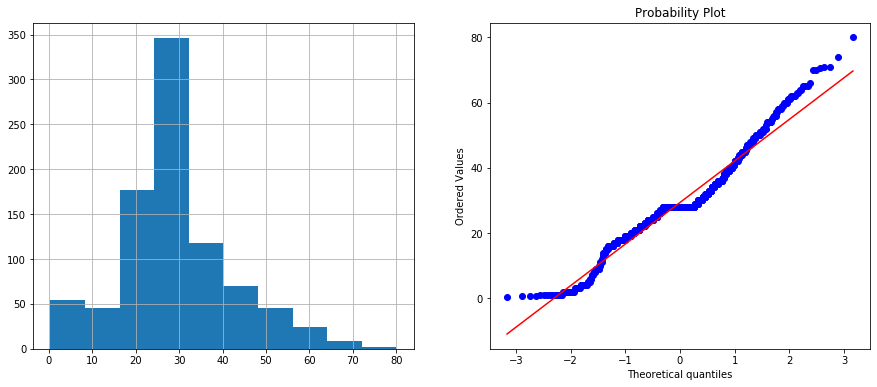

In [24]:
plots(data,'Age')

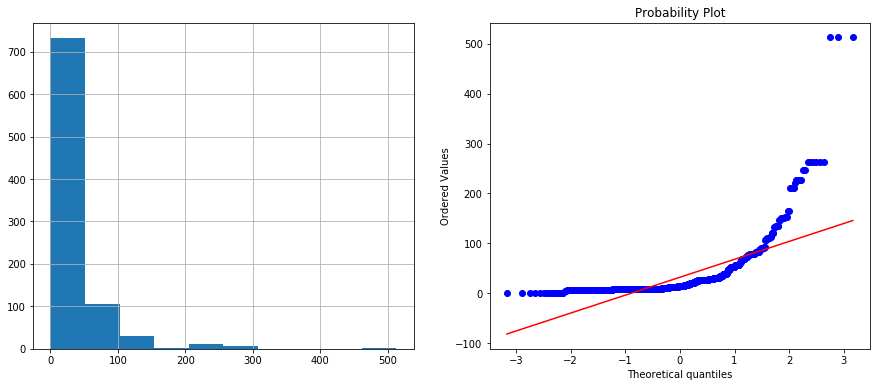

In [25]:
plots(data,'Fare')

In [26]:
# We can obsever Fare is not Normally distributed.So we can apply transformation methods

# Log Transformation

In [28]:
data['Log_Fare']=np.log(data['Fare']+1)

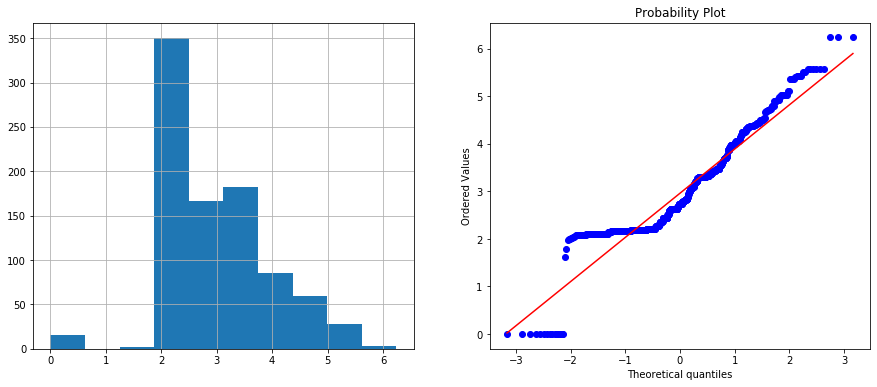

In [29]:
plots(data,'Log_Fare')

In [31]:
# The logarithmic distribution does a good job in making Fare variable look Gaussian Distributed

# Reciprocal Transformation 

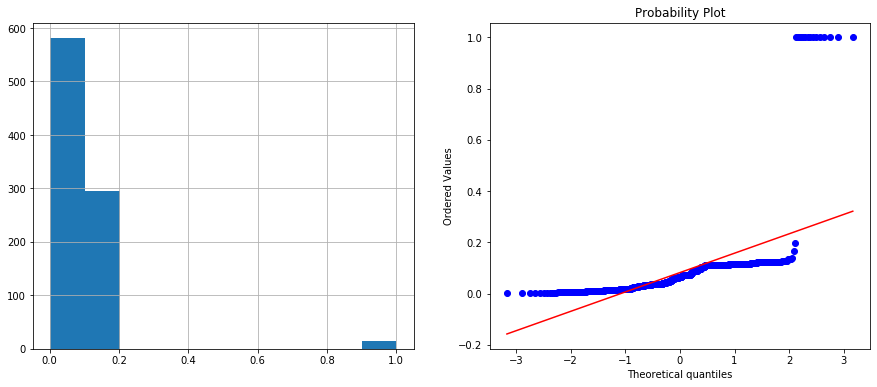

In [33]:
data['Rec_Fare']=1/(data['Fare']+1)
plots(data,'Rec_Fare')

 ### Sqaure Root Tansformation 

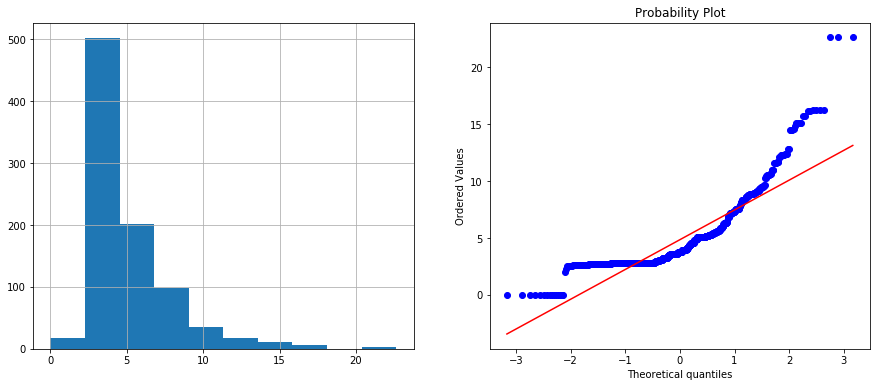

In [34]:
data['sqr_Fare']=data['Fare']**(1/2)
plots(data,'sqr_Fare')

### Exponential Tanformation

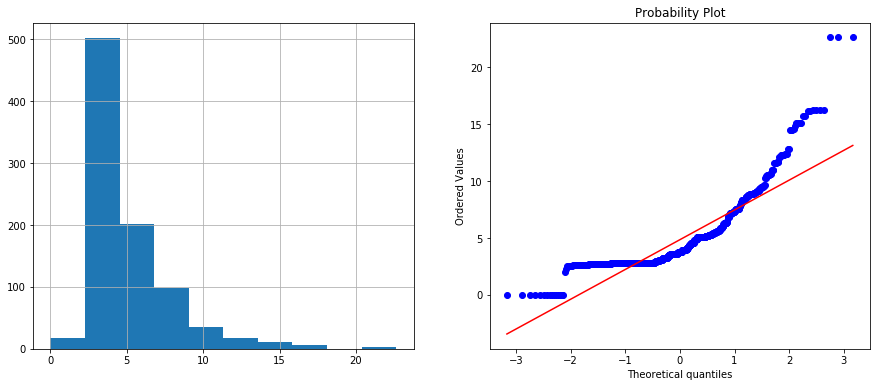

In [35]:
data['Exp_Fare']=data['Fare']**(1/5)
plots(data,'sqr_Fare')

### BoxCox

Optimal lambda:  -0.09778702818680361


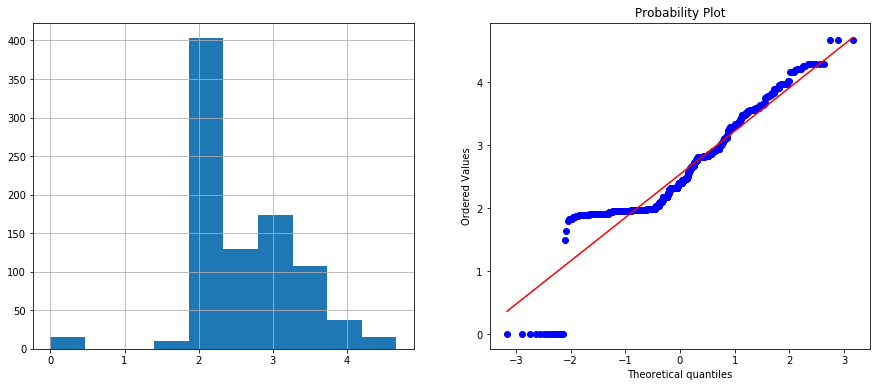

In [37]:
data['Fare_boxcox'], param = stats.boxcox(data.Fare+1) # you can vary the exponent as needed
print('Optimal lambda: ', param)
plots(data, 'Fare_boxcox')